## 初期設定

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

## 画像表示関数の定義

In [18]:
def show_img(img, cmap=None):
    if cmap == 'gray':
        cvt_img = img.copy()
    else:
        cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cvt_img, cmap)
    plt.show()

## テンプレートマッチング

### テンプレート画像の読み込みと表示

<IPython.core.display.Javascript object>


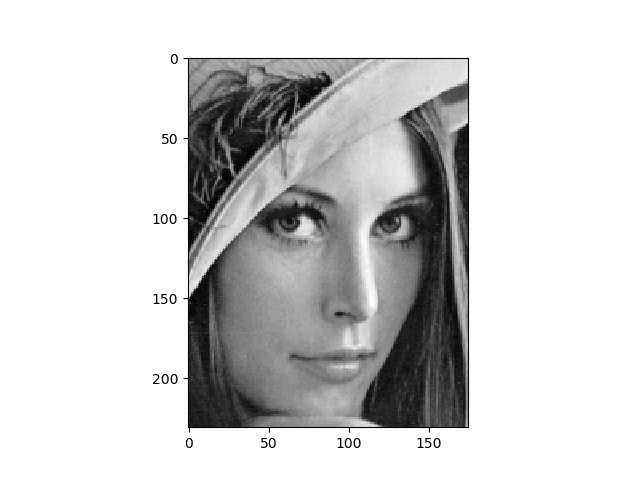

In [19]:
template_img = cv2.imread('./img/template.png', 0)
show_img(template_img, cmap='gray')

### サンプル画像の読み込みと表示

<IPython.core.display.Javascript object>


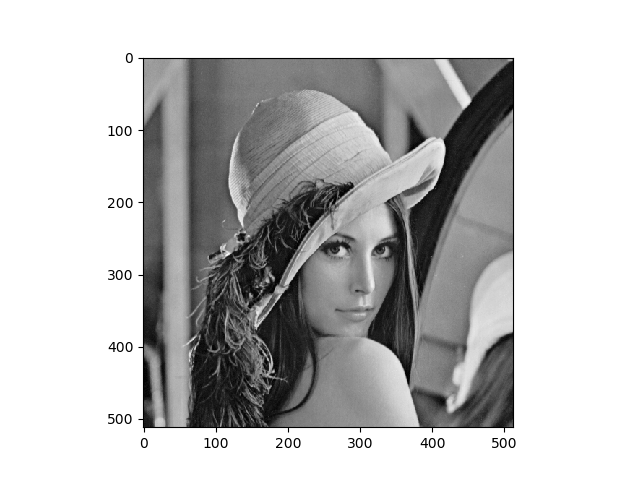

In [20]:
sample_img = cv2.imread('./img/lenna.png', 0)
show_img(sample_img, cmap='gray')

### テンプレートマッチング

<IPython.core.display.Javascript object>


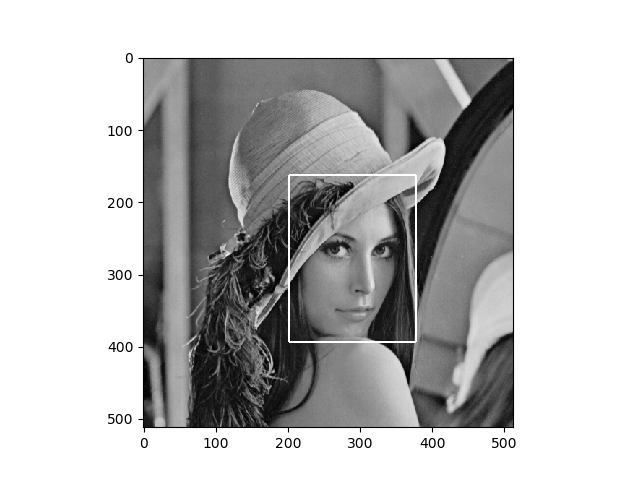

In [24]:
w, h = template_img.shape
src_img = sample_img.copy()
result = cv2.matchTemplate(src_img, template_img, cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = min_loc
bottom_right = (top_left[0] + h, top_left[1] + w)
cv2.rectangle(src_img, top_left, bottom_right, 255, 2)
show_img(src_img, cmap='gray')

## SIFT特徴量

### テンプレート画像から特徴量を算出

<IPython.core.display.Javascript object>


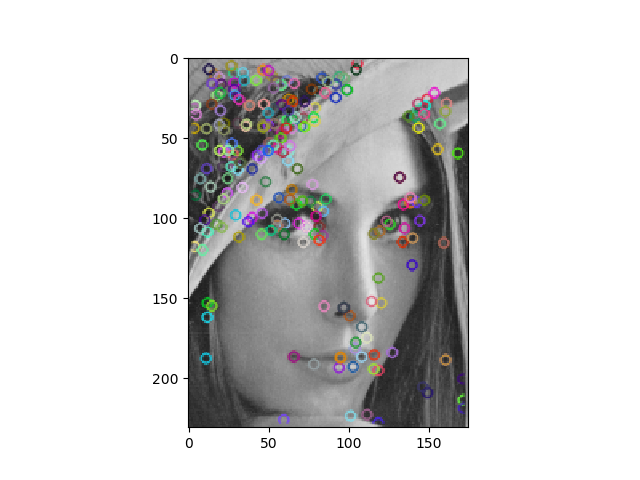

In [63]:
img1 = template_img.copy()
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(test_img, None)
dst_img=cv2.drawKeypoints(img1, kp1, des1)
show_img(dst_img)

### 画像からSIFT特徴量を算出する

<IPython.core.display.Javascript object>


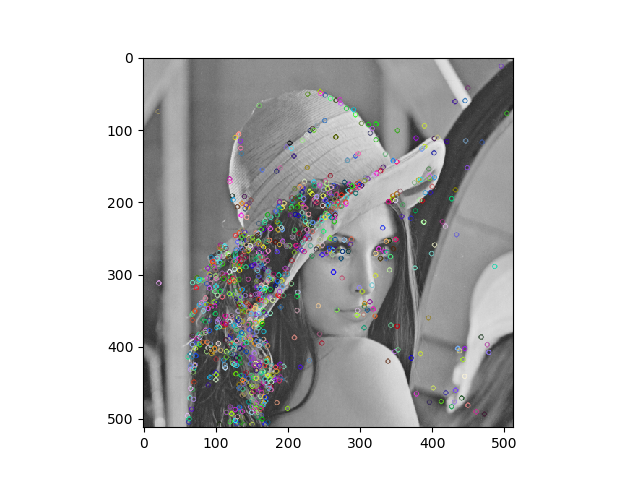

In [75]:
img2 = sample_img.copy()
kp2, des2 = sift.detectAndCompute(img2, None)
dst_img=cv2.drawKeypoints(img2, kp2, des2)
show_img(dst_img)

## 特徴量マッチング

<IPython.core.display.Javascript object>


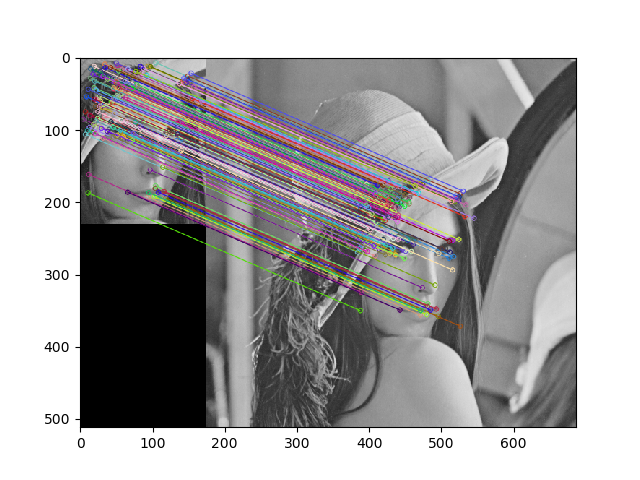

In [76]:
bf_matcher = cv2.BFMatcher()
matches = bf_matcher.knnMatch(descriptor1, descriptor2, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)
img3 = cv2.drawMatches(img1,key_point1,img2,key_point2,good,None, flags=2)
show_img(img3)

<IPython.core.display.Javascript object>


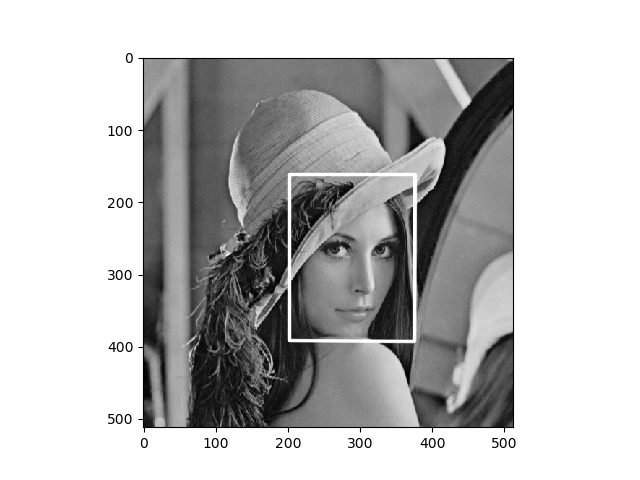

In [77]:
MIN_MATCH_COUNT = 10
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img4 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

show_img(img4, 'gray')

## 比較実験　テンプレートマッチング vs SIFT 特徴量

### 画像の読み込み

<IPython.core.display.Javascript object>


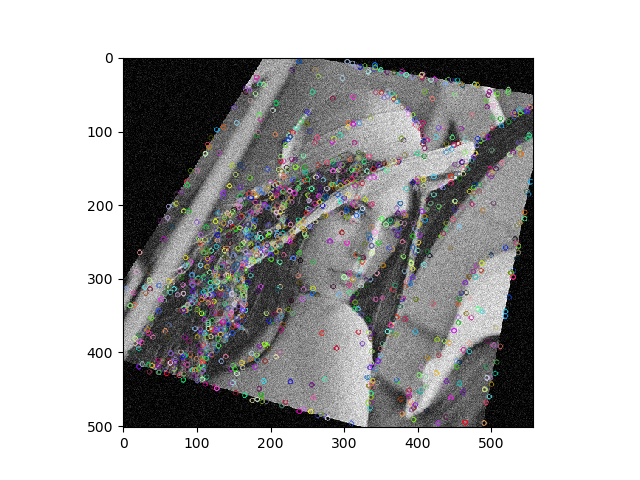

In [97]:
img5 = cv2.imread('./img/lenna2.png', 0)
kp3, des3 = sift.detectAndCompute(img5, None)
dst_img=cv2.drawKeypoints(img5, kp3, des3)
show_img(dst_img)

## テンプレートマッチング

<IPython.core.display.Javascript object>


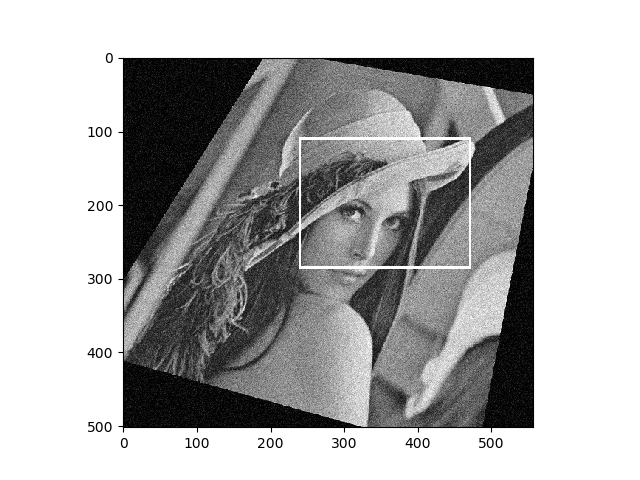

In [98]:
src_img2 = img5.copy()
result2 = cv2.matchTemplate(src_img2, template_img, cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result2)
top_left = min_loc
bottom_right = (top_left[0] + h, top_left[1] + w)
cv2.rectangle(src_img2, top_left, bottom_right, 255, 2)
show_img(src_img2, cmap='gray')

## SIFTマッチング

<IPython.core.display.Javascript object>


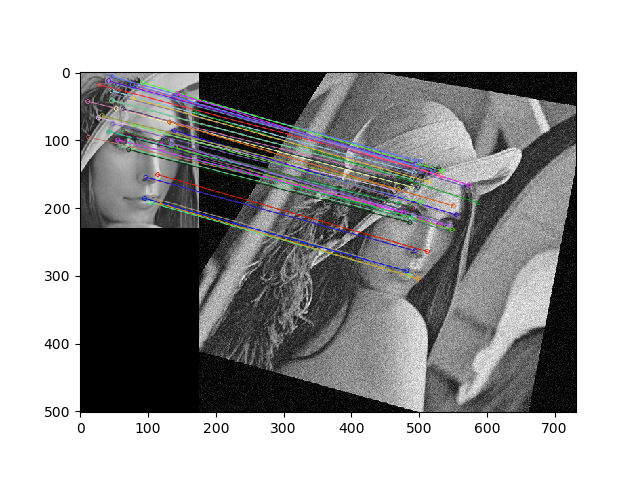

In [100]:
matches = bf_matcher.knnMatch(des1, des3, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)
dst_img3 = cv2.drawMatches(img1,kp1,img5,kp3,good,None, flags=2)
show_img(dst_img3)

<IPython.core.display.Javascript object>


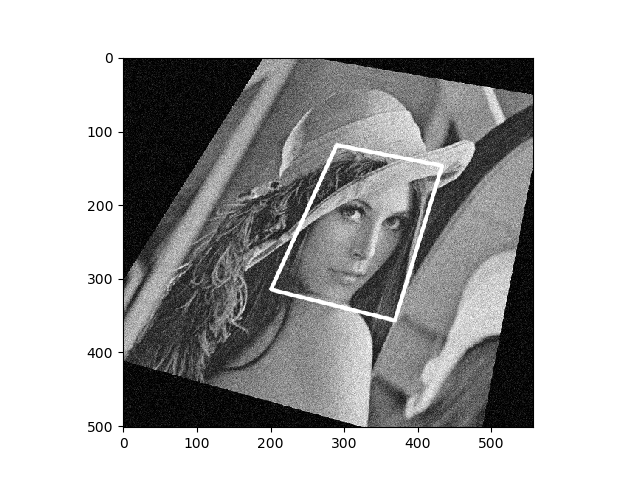

In [102]:
MIN_MATCH_COUNT = 10
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp3[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img6 = cv2.polylines(img5,[np.int32(dst)],True,255,3, cv2.LINE_AA)

show_img(img6, 'gray')

## 顔検出